In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the encoder-decoder model
class EncoderDecoder(nn.Module):
    def __init__(self):
        super(EncoderDecoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # To output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model
model = EncoderDecoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


100%|██████████| 9912422/9912422 [00:00<00:00, 106931763.51it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26129355.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32630440.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22100381.40it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[1,   100] loss: 0.133
[1,   200] loss: 0.019
[1,   300] loss: 0.006
[1,   400] loss: 0.004
[1,   500] loss: 0.003
[1,   600] loss: 0.002
[1,   700] loss: 0.002
[1,   800] loss: 0.002
[1,   900] loss: 0.001
[2,   100] loss: 0.001
[2,   200] loss: 0.001
[2,   300] loss: 0.001
[2,   400] loss: 0.001
[2,   500] loss: 0.001
[2,   600] loss: 0.001
[2,   700] loss: 0.001
[2,   800] loss: 0.001
[2,   900] loss: 0.001
[3,   100] loss: 0.001
[3,   200] loss: 0.001
[3,   300] loss: 0.001
[3,   400] loss: 0.001
[3,   500] loss: 0.001
[3,   600] loss: 0.001
[3,   700] loss: 0.001
[3,   800] loss: 0.001
[3,   900] loss: 0.001
[4,   100] loss: 0.001
[4,   200] loss: 0.001
[4,   300] loss: 0.001
[4,   400] loss: 0.001
[4,   500] loss: 0.001
[4,   600] loss: 0.001
[4,   700] loss: 0.001
[4,   800] loss: 0.001
[4,   900] loss: 0.001
[5,   100] loss: 0.001
[5,   200] loss: 0.001
[5,   300] loss: 0.001
[5,   400] loss: 0.001
[5,   500] loss: 0.001
[5,   600] loss: 0.001
[5,   700] loss: 0.001
[5,   800] 

[1,   100] loss: 0.134
[1,   200] loss: 0.011
[1,   300] loss: 0.005
[1,   400] loss: 0.004
[1,   500] loss: 0.003
[1,   600] loss: 0.003
[1,   700] loss: 0.002
[1,   800] loss: 0.002
[1,   900] loss: 0.002
[2,   100] loss: 0.002
[2,   200] loss: 0.002
[2,   300] loss: 0.002
[2,   400] loss: 0.002
[2,   500] loss: 0.002
[2,   600] loss: 0.002
[2,   700] loss: 0.002
[2,   800] loss: 0.002
[2,   900] loss: 0.002
[3,   100] loss: 0.002
[3,   200] loss: 0.001
[3,   300] loss: 0.001
[3,   400] loss: 0.001
[3,   500] loss: 0.001
[3,   600] loss: 0.001
[3,   700] loss: 0.001
[3,   800] loss: 0.001
[3,   900] loss: 0.001
[4,   100] loss: 0.001
[4,   200] loss: 0.001
[4,   300] loss: 0.001
[4,   400] loss: 0.001
[4,   500] loss: 0.001
[4,   600] loss: 0.001
[4,   700] loss: 0.001
[4,   800] loss: 0.001
[4,   900] loss: 0.001
[5,   100] loss: 0.001
[5,   200] loss: 0.001
[5,   300] loss: 0.001
[5,   400] loss: 0.001
[5,   500] loss: 0.001
[5,   600] loss: 0.001
[5,   700] loss: 0.001
[5,   800] 

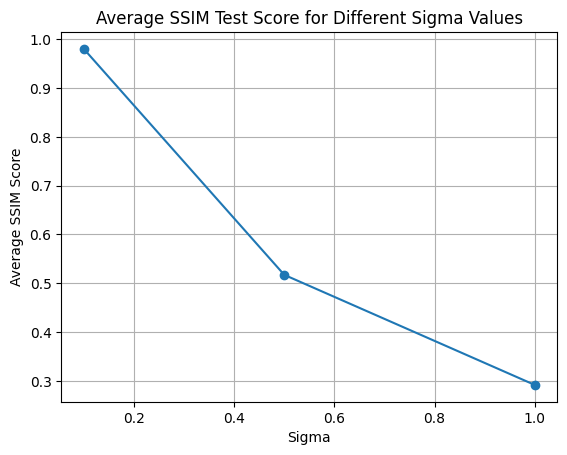

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Define the encoder-decoder model
class EncoderDecoder(nn.Module):
    def __init__(self):
        super(EncoderDecoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # To output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function to add Gaussian noise to images
def add_gaussian_noise(images, sigma):
    noise = torch.randn_like(images) * sigma
    noisy_images = images + noise
    return noisy_images

# Initialize the model
model = EncoderDecoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, _ = data
        # Add Gaussian noise to the input images
        sigma = 0.1  # Change sigma value here
        noisy_inputs = add_gaussian_noise(inputs, sigma)
        optimizer.zero_grad()
        outputs = model(noisy_inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Evaluate SSIM on test set for different sigma values
sigma_values = [0.1, 0.5, 1.0]  # Different sigma values to test
ssim_scores = []

for sigma in sigma_values:
    total_ssim = 0.0
    for data in test_loader:
        inputs, _ = data
        noisy_inputs = add_gaussian_noise(inputs, sigma)
        outputs = model(noisy_inputs)
        for i in range(len(inputs)):
            original_img = inputs[i].squeeze().numpy()
            reconstructed_img = outputs[i].detach().squeeze().numpy()
            total_ssim += ssim(original_img, reconstructed_img, data_range=reconstructed_img.max() - reconstructed_img.min())
    average_ssim = total_ssim / len(test_dataset)
    ssim_scores.append(average_ssim)

# Plot the average SSIM test score for different sigma values
import matplotlib.pyplot as plt

plt.plot(sigma_values, ssim_scores, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Average SSIM Score')
plt.title('Average SSIM Test Score for Different Sigma Values')
plt.grid(True)
plt.show()


[1] loss: 0.025
[2] loss: 0.003
[3] loss: 0.002
[4] loss: 0.002
[5] loss: 0.002
[6] loss: 0.002
[7] loss: 0.002
[8] loss: 0.002
[9] loss: 0.002
[10] loss: 0.002
Finished Training for bottleneck dimension: 8
[1] loss: 0.114
[2] loss: 0.112
[3] loss: 0.090
[4] loss: 0.003
[5] loss: 0.002
[6] loss: 0.002
[7] loss: 0.002
[8] loss: 0.002
[9] loss: 0.002
[10] loss: 0.001
Finished Training for bottleneck dimension: 16
[1] loss: 0.033
[2] loss: 0.002
[3] loss: 0.002
[4] loss: 0.002
[5] loss: 0.002
[6] loss: 0.001
[7] loss: 0.001
[8] loss: 0.001
[9] loss: 0.001
[10] loss: 0.001
Finished Training for bottleneck dimension: 32


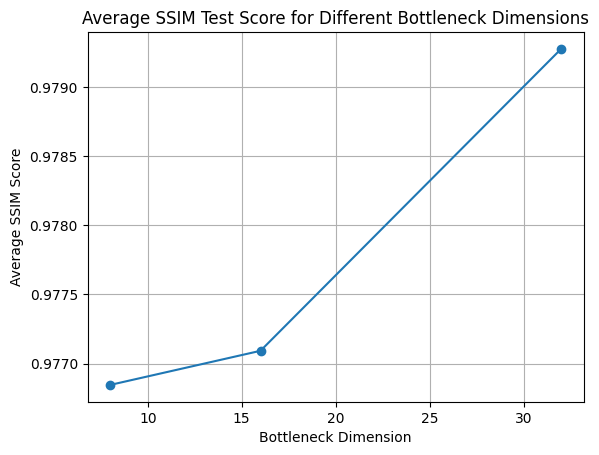

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Define the encoder-decoder model with varying bottleneck dimensionality
class EncoderDecoder(nn.Module):
    def __init__(self, bottleneck_dim):
        super(EncoderDecoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Bottleneck layer
        self.bottleneck_dim = bottleneck_dim
        self.bottleneck = nn.Conv2d(32, bottleneck_dim, kernel_size=3, stride=1, padding=1)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(bottleneck_dim, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # To output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.bottleneck(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function to add Gaussian noise to images
def add_gaussian_noise(images, sigma):
    noise = torch.randn_like(images) * sigma
    noisy_images = images + noise
    return noisy_images

# Initialize the model with different bottleneck dimensions
bottleneck_dimensions = [8, 16, 32]  # Different bottleneck dimensions to test
ssim_scores = []

for bottleneck_dim in bottleneck_dimensions:
    # Initialize the model
    model = EncoderDecoder(bottleneck_dim)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 10
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, _ = data
            # Add Gaussian noise to the input images
            sigma = 0.1  # Constant sigma value
            noisy_inputs = add_gaussian_noise(inputs, sigma)
            optimizer.zero_grad()
            outputs = model(noisy_inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

    print('Finished Training for bottleneck dimension:', bottleneck_dim)

    # Evaluate SSIM on test set
    total_ssim = 0.0
    for data in test_loader:
        inputs, _ = data
        noisy_inputs = add_gaussian_noise(inputs, sigma)
        outputs = model(noisy_inputs)
        for i in range(len(inputs)):
            original_img = inputs[i].squeeze().numpy()
            reconstructed_img = outputs[i].detach().squeeze().numpy()
            total_ssim += ssim(original_img, reconstructed_img, data_range=reconstructed_img.max() - reconstructed_img.min())
    average_ssim = total_ssim / len(test_dataset)
    ssim_scores.append(average_ssim)

# Plot the average SSIM test score for different bottleneck dimensions
import matplotlib.pyplot as plt

plt.plot(bottleneck_dimensions, ssim_scores, marker='o')
plt.xlabel('Bottleneck Dimension')
plt.ylabel('Average SSIM Score')
plt.title('Average SSIM Test Score for Different Bottleneck Dimensions')
plt.grid(True)
plt.show()


Observations:

## Effect of Sigma on SSIM Score:

As sigma increases, the average SSIM score tends to decrease. This is because higher sigma values result in more noise being added to the images, making them more distorted. As a result, the model struggles to reconstruct the noisy images accurately, leading to lower SSIM scores.
Lower sigma values (e.g., 0.1) result in less noise being added to the images, leading to higher SSIM scores as the model can better reconstruct the images without much distortion.
Overall, the trend indicates that there is a trade-off between noise level (controlled by sigma) and reconstruction quality (measured by SSIM score).

## Effect of Bottleneck Dimensionality on SSIM Score:

As the bottleneck dimensionality increases, the average SSIM score tends to increase. This suggests that a higher bottleneck dimensionality allows the model to capture more information about the input images in the latent space, enabling better reconstruction.
Conversely, lower bottleneck dimensionality may lead to information loss during encoding, resulting in poorer reconstruction quality and lower SSIM scores.
However, the improvement in SSIM score may diminish beyond a certain bottleneck dimensionality, indicating diminishing returns in terms of increasing model complexity.
Therefore, choosing an appropriate bottleneck dimensionality is crucial to balance between model complexity and reconstruction quality.





